In [1]:
from ex2_1_1 import * 
import matplotlib.pyplot as plt
from scipy.linalg import svd

Text(0.5, 1.0, 'NanoNose: attribute standard deviations')

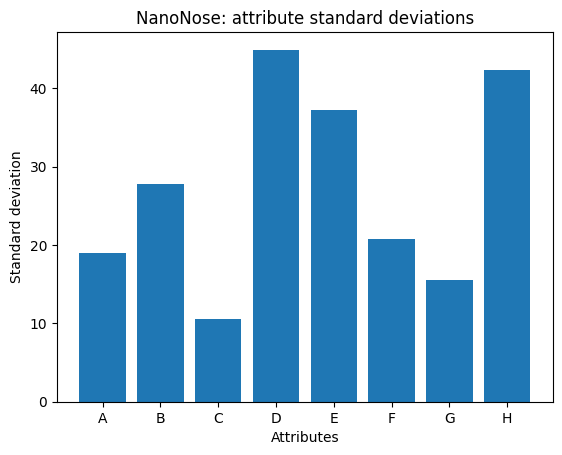

In [2]:
r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X,0))
plt.xticks(r, attributeNames)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('NanoNose: attribute standard deviations')

In [4]:
Y1 = X - np.ones((N, 1))*X.mean(0)
Y1

array([[ 8.60347333e+01,  6.72765741e-01, -4.49826759e+00,
        -1.14877340e+01,  3.64204696e+01,  6.17674351e+00,
        -1.04582642e+01, -1.89198959e+01],
       [ 8.50347333e+01, -3.32723426e+00, -5.49826759e+00,
        -1.79454264e+01,  3.54916234e+01,  4.33674351e+00,
        -1.10581042e+01, -1.82105870e+01],
       [ 8.25347333e+01, -4.32723426e+00, -7.49826759e+00,
        -1.23723494e+01,  3.48723927e+01,  4.49130351e+00,
        -1.08336242e+01, -1.95291962e+01],
       [ 4.35347333e+01, -1.28272343e+01, -7.99826759e+00,
        -1.98915802e+01,  7.44931574e+00, -8.44560959e+00,
        -1.43843801e+01, -1.99493768e+01],
       [ 4.15347333e+01, -1.28272343e+01, -7.99826759e+00,
        -1.85646571e+01,  6.34354651e+00, -8.56457511e+00,
        -1.44121387e+01, -2.00343681e+01],
       [ 4.05347333e+01, -1.23272343e+01, -7.99826759e+00,
        -1.94492725e+01,  5.90123882e+00, -8.54871304e+00,
        -1.42495525e+01, -2.00185220e+01],
       [ 1.80347333e+01, -1.632723

In [5]:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
Y2

array([[ 4.52727808e+00,  2.42295797e-02, -4.28376971e-01,
        -2.55673836e-01,  9.78486229e-01,  2.97844726e-01,
        -6.73096789e-01, -4.47339147e-01],
       [ 4.47465657e+00, -1.19829954e-01, -5.23608516e-01,
        -3.99397825e-01,  9.53531494e-01,  2.09119284e-01,
        -7.11702657e-01, -4.30568355e-01],
       [ 4.34310278e+00, -1.55844837e-01, -7.14071605e-01,
        -2.75362053e-01,  9.36895004e-01,  2.16572221e-01,
        -6.97255062e-01, -4.61745352e-01],
       [ 2.29086366e+00, -4.61971345e-01, -7.61687377e-01,
        -4.42711903e-01,  2.00136158e-01, -4.07250239e-01,
        -9.25782695e-01, -4.71680038e-01],
       [ 2.18562063e+00, -4.61971345e-01, -7.61687377e-01,
        -4.13179577e-01,  1.70428140e-01, -4.12986798e-01,
        -9.27569247e-01, -4.73689559e-01],
       [ 2.13299911e+00, -4.43963903e-01, -7.61687377e-01,
        -4.32867795e-01,  1.58544933e-01, -4.12221923e-01,
        -9.17105154e-01, -4.73314897e-01],
       [ 9.49015006e-01, -5.880234

In [6]:
Ys = [Y1, Y2]
titles = ['Zero-mean', 'Zero-mean and unit variance']
threshold = 0.9
i = 0
j = 1

/tmp/ipykernel_19588/2281039047.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, 1+k)


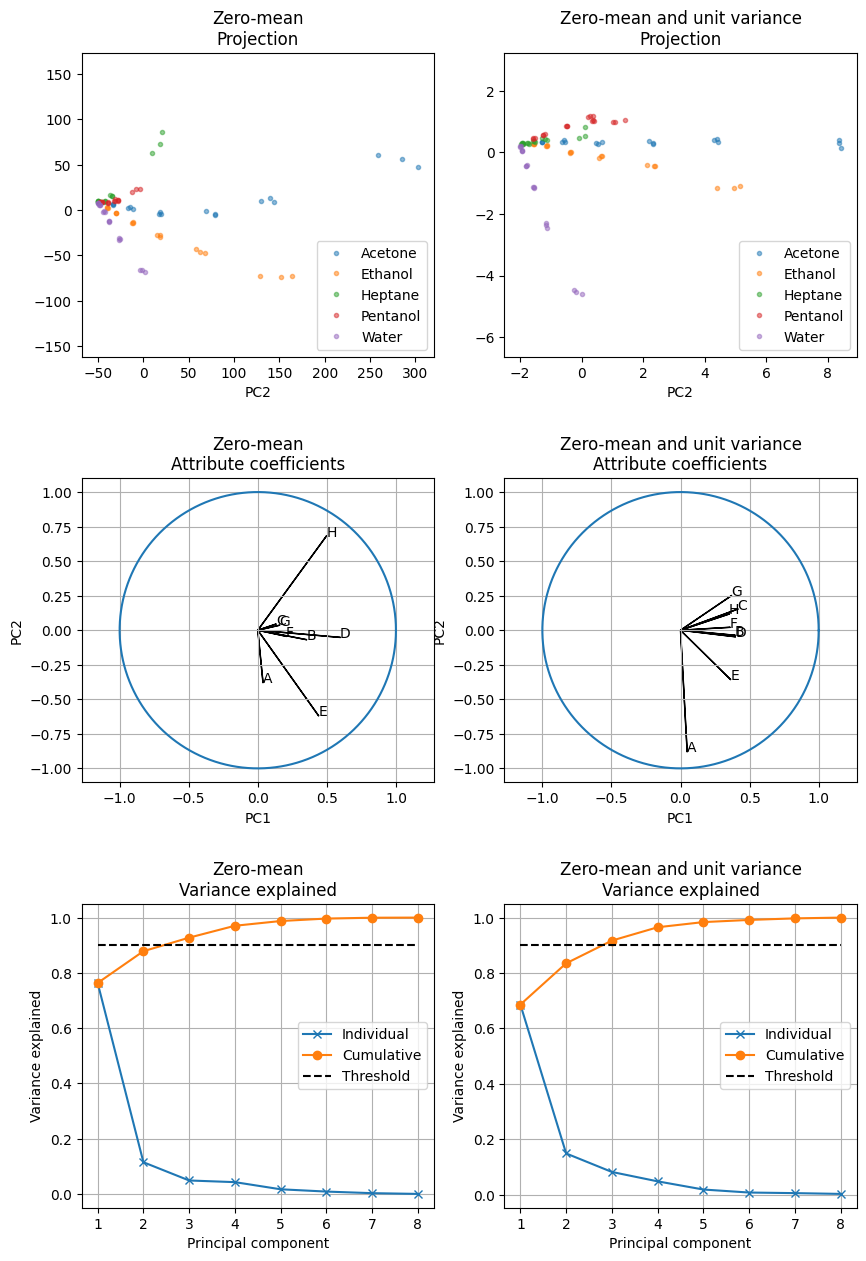

In [7]:
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.4)
plt.title('NanoNose: Effect of standardization')
nrows=3
ncols=2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U,S,Vh = svd(Ys[k],full_matrices=False)
    V=Vh.T # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k==1: V = -V; U = -U; 
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S;
    
    # Plot projection
    plt.subplot(nrows, ncols, 1+k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], '.', alpha=.5)
    plt.xlabel('PC'+str(i+1))
    plt.xlabel('PC'+str(j+1))
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(classNames)
    plt.axis('equal')
    
    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols,  3+k)
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], attributeNames[att])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
    # Add a unit circle
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
            
    # Plot cumulative variance explained
    plt.subplot(nrows, ncols,  5+k);
    plt.plot(range(1,len(rho)+1),rho,'x-')
    plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
    plt.plot([1,len(rho)],[threshold, threshold],'k--')
    plt.title('Variance explained by principal components');
    plt.xlabel('Principal component');
    plt.ylabel('Variance explained');
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance explained')

plt.show()